<a href="https://colab.research.google.com/github/AbhishekRP2002/ML-AI-Notes-and-Self-Parctice/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 %tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Enabling GPU in colab nevironment will speed up the computing and make the model run faster. Above is the code for checking and enabling GPU.**
To enable GPUs for the notebook:


* Navigate to Edit→Notebook Settings
* select GPU from the Hardware Accelerator drop-down   





In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

TypeError: ignored

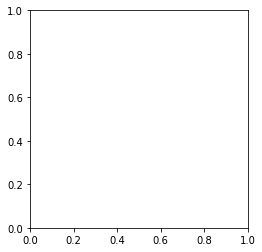

In [3]:
url = ('/content/cnn.jpeg')
img = cv2.imread(url)
plt.imshow(img)

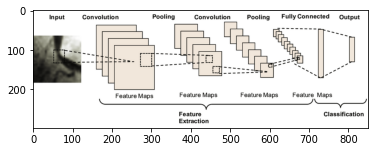

In [4]:
url = ('/content/The-architecture-of-a-typical-Convolutional-Neural-Network-CNN.png')

img = cv2.imread(url)
plt.imshow(img)

## **Image Classification using CNN**

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets ,layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train , y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [6]:
y_train.shape #The output here means 50000 samples and 1D array which stores the output .

(50000, 1)

In [23]:
X_test.shape


(10000, 32, 32, 3)

In [24]:
y_train[:100]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3,
       6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7,
       1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1,
       4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7,
       9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1], dtype=uint8)

In [25]:
y_train = y_train.reshape(-1,) 
y_train[:100]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3,
       6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7,
       1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1,
       4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7,
       9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1], dtype=uint8)

**Image size is 32*32 and 3 is for RGB channels**

In [17]:
classes =["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [26]:
classes[4]

'deer'

In [34]:
def plot_sample(x,y, index):
 plt.figure(figsize = (6,2))
 plt.imshow(X_train[index])
 plt.xlabel(classes[y[index]])

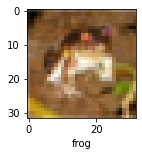

In [35]:
plot_sample(X_train,y_train, 0)

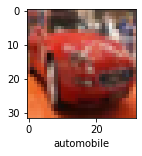

In [36]:
plot_sample(X_train,y_train, 5)

Now we have to normalize our image , Divide by 255 .

In [38]:
X_train=X_train/255
y_train = y_train/255

**Model Building**

ANN model 

In [42]:
ann = models.Sequential([
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),

])

ann.compile (optimizer='SGD',
loss='sparse_categorical_crossentropy',  #When you have disrete values in y training use sparse_categorical_crossentropy
metrics=['accuracy']) #and when u have one hot encoding use categorical_crossentropy


ann.fit(X_train, y_train , epochs =5)


Epoch 1/5
1563/1563 [==============================] - 13s 7ms/step - loss: 0.0033 - accuracy: 0.0999
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 3.1702e-04 - accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0209e-04 - accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5096e-04 - accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2142e-04 - accuracy: 0.1000


*When your y value is Hot encoded i.e either 0 or 1 the  use loss = categorical_crossentropy and when it is a normal value then use loss=sparse_categorical_crossentropy*

CNN Model

In [45]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),activation= 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation= 'relu'),
    layers.MaxPooling2D(2,2),

    #dense
    layers.Flatten(input_shape= (32,32,3)),
    layers.Dense(72,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dense(10,activation='softmax'),

])

In [46]:
cnn.compile (optimizer='adam',
loss='sparse_categorical_crossentropy',  
metrics=['accuracy'])

In [47]:
cnn.fit(X_train, y_train , epochs=10)

Epoch 1/10
1563/1563 [==============================] - 19s 7ms/step - loss: 0.0042 - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0998e-08 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 9.6372e-09 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 6.8678e-09 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 3.8310e-09 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.8500e-09 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 7.2955e-10 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 3.7431e-10 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9312e-10 - accuracy: 0.1000
Epoch 10/10
1563/1563 [==================

In [48]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 19172.4824 - accuracy: 0.1000


[19172.482421875, 0.10000000149011612]

In [49]:
y_pred = cnn.predict(X_test)
np.argmax(y_pred[:5])

0

In [50]:
classes[0]

'airplane'

In [51]:
print("Classification Report: \n", classification_report(y_test, y_classes))

NameError: ignored

## **Convolution Padding and Stride**

In [5]:
url =('/content/convolution_math.jpg')
img =plt.imread(url) 

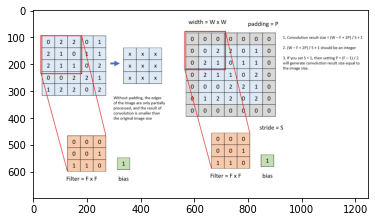

In [6]:
plt.imshow(img)

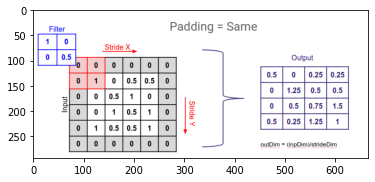

In [7]:
url =('/content/padding.png')
img =plt.imread(url) 
plt.imshow(img)

For corner pixels , they dont contribute much in the feature detection process and suffer from Border problem. Due to this reason they don't participate much in the image classification process  or feature engineering. So in order to retain those features , padding is used .
* **Valid Convolution : No padding**  
* **Same convolution : Pad such that the output is same as input**

padding - 'same'
